In [1]:
# %load har.py
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
#1. load dataset
def load_dataset():
    # read dataset file for i in range(0,19):
     for i in range(0,19):
        df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('The dataset ' + str(i + 1) + ' contains %d rows.' % len(df))
load_dataset()

The dataset 1 contains 245576 rows.
The dataset 2 contains 301901 rows.
The dataset 3 contains 245985 rows.
The dataset 4 contains 248239 rows.
The dataset 5 contains 254178 rows.
The dataset 6 contains 224073 rows.
The dataset 7 contains 261959 rows.
The dataset 8 contains 231653 rows.
The dataset 9 contains 248855 rows.
The dataset 10 contains 242709 rows.
The dataset 11 contains 240251 rows.
The dataset 12 contains 254794 rows.
The dataset 13 contains 246190 rows.
The dataset 14 contains 244144 rows.
The dataset 15 contains 241272 rows.
The dataset 16 contains 255201 rows.
The dataset 17 contains 239838 rows.
The dataset 18 contains 229396 rows.
The dataset 19 contains 230628 rows.


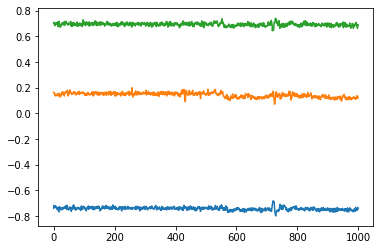

In [3]:
#2. visualize data

#document your progress and think critically what are missing from such IoT application and what are missing to move such IoT application from PoC (proof of concept) to solve real-world life
#think with which components added, what kind of real-world problems can be solved by it -> this shall be discussed in the conclusion part in the document

'''
At first, we should explore the raw time-series sensor data. We could draw line plot of sensor signals.
In this example code, the wrist sensor accelerometer data dataset_1 sitting activity is visualized.   
'''

def data_visulization():
    activity = ['sitting', 'lying', 'standing', 'washing_dishes', 'vacuuming', 'sweeping', 'walking', 'ascending_stairs', 'descending_stairs', 'treadmill_running', 'bicycling_on_ergometer_50w', 'bicycling_on_ergometer_100w', 'rope_jumping']
    # read dataset file for i in range(0,19):
    for i in range(0,19):
        df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)

    df_sitting = df[df[24] == 1].values
    df_lying = df[df[24] == 2].values
    df_standing = df[df[24] == 3].values
    df_washing_dishes = df[df[24] == 4].values
    df_vacuuming = df[df[24] == 5].values
    df_sweeping = df[df[24] == 6].values
    df_walking = df[df[24] == 7].values
    df_ascending_stairs = df[df[24] == 8].values
    df_descending_stairs = df[df[24] == 9].values
    df_treadmill_running = df[df[24] == 10].values
    df_bicycling_on_ergometer_50w = df[df[24] == 11].values
    df_bicycling_on_ergometer_100w = df[df[24] == 12].values
    df_rope_jumping = df[df[24] == 13].values


#To visualise certain accelerometer or gyproscope data for activity just uncomment necessary code line.
    # Accelerometer 
    #plt.plot(df_sitting[500:1500, 0:3])
    #plt.plot(df_lying[500:1500, 0:3])
    #plt.plot(df_standing[500:1500, 0:3])
    #plt.plot(df_washing_dishes[500:1500, 0:3])
    #plt.plot(df_vacuuming[500:1500, 0:3])
    #plt.plot(df_sweeping[500:1500, 0:3])
    #plt.plot(df_walking[500:1500, 0:3])
    #plt.plot(df_ascending_stairs[500:1500, 0:3])
    #plt.plot(df_descending_stairs[500:1500, 0:3])
    #plt.plot(df_treadmill_running[500:1500, 0:3])
    #plt.plot(df_bicycling_on_ergometer_50w[500:1500, 0:3])
    #plt.plot(df_bicycling_on_ergometer_100w[500:1500, 0:3])
    #plt.plot(df_rope_jumping[500:1500, 0:3])
    
    #Gyroscope
    #plt.plot(df_sitting[500:1500, 3:6])
    #plt.plot(df_lying[500:1500, 3:6])
    #plt.plot(df_standing[500:1500, 3:6])
    #plt.plot(df_washing_dishes[500:1500, 3:6])
    #plt.plot(df_vacuuming[500:1500, 3:6])
    #plt.plot(df_sweeping[500:1500, 3:6])
    #plt.plot(df_walking[500:1500, 3:6])
    #plt.plot(df_ascending_stairs[500:1500, 3:6])
    #plt.plot(df_descending_stairs[500:1500, 3:6])
    #plt.plot(df_treadmill_running[500:1500, 3:6])
    #plt.plot(df_bicycling_on_ergometer_50w[500:1500, 3:6])
    #plt.plot(df_bicycling_on_ergometer_100w[500:1500, 3:6])
    #plt.plot(df_rope_jumping[500:1500, 3:6])
    
    plt.show()
data_visulization()

In [4]:
#3. remove signal noises
'''
For raw sensor data, it usually contains noise that arises from different sources, such as sensor mis-
calibration, sensor errors, errors in sensor placement, or noisy environments. We could apply filter to remove noise of sensor data
to smooth data. In this example code, Butterworth low-pass filter is applied. 
'''
def noise_removing():
    # Butterworth low-pass filter. 
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    # read dataset file for i in range(0,19):
    for i in range(0,19):
        df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)
    
        df_sitting = df[df[24] == 1].values
        df_lying = df[df[24] == 2].values
        df_standing = df[df[24] == 3].values
        df_washing_dishes = df[df[24] == 4].values
        df_vacuuming = df[df[24] == 5].values
        df_sweeping = df[df[24] == 6].values
        df_walking = df[df[24] == 7].values
        df_ascending_stairs = df[df[24] == 8].values
        df_descending_stairs = df[df[24] == 9].values
        df_treadmill_running = df[df[24] == 10].values
        df_bicycling_on_ergometer_50w = df[df[24] == 11].values
        df_bicycling_on_ergometer_100w = df[df[24] == 12].values
        df_rope_jumping = df[df[24] == 13].values
    for i in range(0,3):
        df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
        df_lying[:,i] = signal.lfilter(b, a, df_lying[:, i])
        df_standing[:,i] = signal.lfilter(b, a, df_standing[:, i])
        df_washing_dishes[:,i] = signal.lfilter(b, a, df_washing_dishes[:, i])
        df_vacuuming[:,i] = signal.lfilter(b, a, df_vacuuming[:, i])
        df_sweeping[:,i] = signal.lfilter(b, a, df_sweeping[:, i])
        df_walking[:,i] = signal.lfilter(b, a, df_walking[:, i])
        df_ascending_stairs[:,i] = signal.lfilter(b, a, df_ascending_stairs[:, i])
        df_descending_stairs[:,i] = signal.lfilter(b, a, df_descending_stairs[:, i])
        df_treadmill_running[:,i] = signal.lfilter(b, a, df_treadmill_running[:, i])
        df_bicycling_on_ergometer_50w[:,i] = signal.lfilter(b, a, df_bicycling_on_ergometer_50w[:, i])
        df_bicycling_on_ergometer_100w[:,i] = signal.lfilter(b, a, df_bicycling_on_ergometer_100w[:, i])
        df_rope_jumping[:,i] = signal.lfilter(b, a, df_rope_jumping[:, i])
    for y in range(3,6):
        df_sitting[:,y] = signal.lfilter(b, a, df_sitting[:, y])
        df_lying[:,y] = signal.lfilter(b, a, df_lying[:, y])
        df_standing[:,y] = signal.lfilter(b, a, df_standing[:, y])
        df_washing_dishes[:,y] = signal.lfilter(b, a, df_washing_dishes[:, y])
        df_vacuuming[:,y] = signal.lfilter(b, a, df_vacuuming[:, y])
        df_sweeping[:,y] = signal.lfilter(b, a, df_sweeping[:, y])
        df_walking[:,y] = signal.lfilter(b, a, df_walking[:, y])
        df_ascending_stairs[:,y] = signal.lfilter(b, a, df_ascending_stairs[:, y])
        df_descending_stairs[:,y] = signal.lfilter(b, a, df_descending_stairs[:, y])
        df_treadmill_running[:,y] = signal.lfilter(b, a, df_treadmill_running[:, y])
        df_bicycling_on_ergometer_50w[:,y] = signal.lfilter(b, a, df_bicycling_on_ergometer_50w[:, y])
        df_bicycling_on_ergometer_100w[:,y] = signal.lfilter(b, a, df_bicycling_on_ergometer_100w[:, y])
        df_rope_jumping[:,y] = signal.lfilter(b, a, df_rope_jumping[:, y])
        
#To visualise certain accelerometer or gyproscope data for activity just uncomment necessary code line.
    #Accelerometer
    #plt.plot(df_sitting[500:1500, 0:3])
    #plt.plot(df_lying[500:1500, 0:3])
    #plt.plot(df_standing[500:1500, 0:3])
    #plt.plot(df_washing_dishes[500:1500, 0:3])
    #plt.plot(df_vacuuming[500:1500, 0:3])
    #plt.plot(df_sweeping[500:1500, 0:3])
    #plt.plot(df_walking[500:1500, 0:3])
    #plt.plot(df_ascending_stairs[500:1500, 0:3])
    #plt.plot(df_descending_stairs[500:1500, 0:3])
    #plt.plot(df_treadmill_running[500:1500, 0:3])
    #plt.plot(df_bicycling_on_ergometer_50w[500:1500, 0:3])
    #plt.plot(df_bicycling_on_ergometer_100w[500:1500, 0:3])
    #plt.plot(df_rope_jumping[500:1500, 0:3])
    #Gyroscope
    #plt.plot(df_sitting[500:1500, 3:6])
    #plt.plot(df_lying[500:1500, 3:6])
    #plt.plot(df_standing[500:1500, 3:6])
    #plt.plot(df_washing_dishes[500:1500, 3:6])
    #plt.plot(df_vacuuming[500:1500, 3:6])
    #plt.plot(df_sweeping[500:1500, 3:6])
    #plt.plot(df_walking[500:1500, 3:6])
    #plt.plot(df_ascending_stairs[500:1500, 3:6])
    #plt.plot(df_descending_stairs[500:1500, 3:6])
    #plt.plot(df_treadmill_running[500:1500, 3:6])
    #plt.plot(df_bicycling_on_ergometer_50w[500:1500, 3:6])
    #plt.plot(df_bicycling_on_ergometer_100w[500:1500, 3:6])
    #plt.plot(df_rope_jumping[500:1500, 3:6])
    plt.show()
noise_removing()

In [5]:
#4. extract features 
#5. prepare training set
#6. training the given models 
#7. test the given models
'''
To build a human activity recognition system, we need to extract features from raw data and create feature dataset for training 
machine learning models.

Please create new functions to implement your own feature engineering. The function should output training and testing dataset.
'''
def feature_engineering_example():
    training = np.empty(shape=(0, 73))
    testing = np.empty(shape=(0, 73))
    # deal with each dataset file
    for i in range(0,19):
        df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('deal with dataset ' + str(i + 1))
        for c in range(1, 14):
            activity_data = df[df[24] == c].values
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            datat_len = len(activity_data)
            training_len = math.floor(datat_len * 0.8)
            training_data = activity_data[:training_len, :]
            testing_data = activity_data[training_len:, :]

            training_sample_number = training_len // 1000 + 1
            testing_sample_number = (datat_len - training_len) // 1000 + 1

            for s in range(training_sample_number):
                if s < training_sample_number - 1:
                    sample_data = training_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = training_data[1000*s:, :]
                # All 24 sensor data is used to extract three simple features: min, max, and mean value in
                # a period of time. Finally we get 72 features and 1 label to construct feature dataset. 

                feature_sample = []
                for i in range(24):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                training = np.concatenate((training, feature_sample), axis=0)
            
            for s in range(testing_sample_number):
                if s < training_sample_number - 1:
                    sample_data = testing_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = testing_data[1000*s:, :]

                feature_sample = []
                for i in range(24):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i])) 
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                testing = np.concatenate((testing, feature_sample), axis=0)

    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)
feature_engineering_example()

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19


In [6]:
#8. print out the evaluation results 
'''
When we have training and testing feature set, we could build machine learning models to recognize human activities.

Please create new functions to fit your features and try other models.
'''
def model_training_and_evaluation_example():
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)

    y_train = df_training[df_testing.shape[1]-1].values
    # Labels should start from 0 in sklearn
    y_train = y_train - 1
    df_training = df_training.drop([df_testing.shape[1]-1], axis=1)
    X_train = df_training.values

    y_test = df_testing[df_testing.shape[1]-1].values
    y_test = y_test - 1
    df_testing = df_testing.drop([df_testing.shape[1]-1], axis=1)
    X_test = df_testing.values
    
    # Feature normalization for improving the performance of machine learning models. 
    # StandardScaler is used to scale original feature to be centered around zero.
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Build KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Evaluation. when we train a machine learning model on training set, we should evaluate its performance on testing set.
    # We could evaluate the model by different metrics. Firstly, we could calculate the classification accuracy. 
    y_pred = knn.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    # We could use confusion matrix to view the classification for each activity.
    print(confusion_matrix(y_test, y_pred))
    

    # Another machine learning model: svm. In this example code, we use gridsearch to find the optimial classifier
    # It will take a long time to find the optimal classifier.
    # the accuracy for SVM classifier with default parameters is 0.71, 
    # which is worse than KNN. The reason may be parameters of svm classifier are not optimal.  
    # Another reason may be we only use 9 features and they are not enough to build a good svm classifier. 
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 100]},
                    {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}]
    acc_scorer = make_scorer(accuracy_score)
    grid_obj  = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=acc_scorer)
    grid_obj  = grid_obj .fit(X_train, y_train)
    clf = grid_obj.best_estimator_
    print('best clf:', clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

#print("# Tuning hyper-parameters for %s" % score)
#print()
#clf = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=score)
#clf.fit(x_train, y_train)
model_training_and_evaluation_example()

Accuracy:  0.9222648752399232
[[ 57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  56   1   0   0   0   0   0   0   0   0   0]
 [  0   0   2  96   1   0   0   0   0   0   0   0   0]
 [  0   0   1   1  47   5   1   1   1   0   0   0   0]
 [  0   0   0   1  16  67   0   1   0   0   0   0   0]
 [  0   0   2   0   3   1 211   1   0   0   1   0   0]
 [  0   0   1   0   0   0   2  35   0   0   0   1   0]
 [  0   0   0   0   0   1   2   0  35   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  95   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0  82  17   0]
 [  0   0   0   0   0   0   1   0   1   0  12  86   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0  37]]


I:\Tony\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best clf: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy:  0.9309021113243762
[[ 57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  57   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1  96   1   1   0   0   0   0   0   0   0]
 [  0   0   1   1  47   8   0   0   0   0   0   0   0]
 [  0   0   0   1   7  77   0   0   0   0   0   0   0]
 [  0   0   2   0   3   4 210   0   0   0   0   0   0]
 [  0   0   0   0   1   1   0  37   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  36   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0  95   0   0   0]
 [  0   0   0   0   0   3   0   0   0   0  84  13   0]
 [  0   0   0   0   0   2   0   0   0   0  17  81   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0  36]]


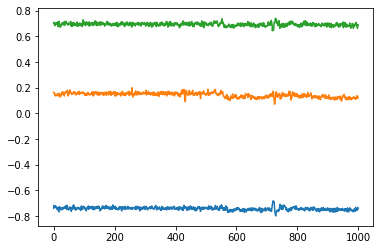

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19
Accuracy:  0.9222648752399232
[[ 57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  56   1   0   0   0   0   0   0   0   0   0]
 [  0   0   2  96   1   0   0   0   0   0   0   0   0]
 [  0   0   1   1  47   5   1   1   1   0   0   0   0]
 [  0   0   0   1  16  67   0   1   0   0   0   0   0]
 [  0   0   2   0   3   1 211   1   0   0   1   0   0]
 [  0   0   1   0   0   0   2  35   0   0   0   1   0]
 [  0   0   0   0   0   1   2   0  35   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  95   0   0   0]
 [  0   0   0   0   0   1   0 

I:\Tony\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best clf: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy:  0.9309021113243762
[[ 57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  57   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1  96   1   1   0   0   0   0   0   0   0]
 [  0   0   1   1  47   8   0   0   0   0   0   0   0]
 [  0   0   0   1   7  77   0   0   0   0   0   0   0]
 [  0   0   2   0   3   4 210   0   0   0   0   0   0]
 [  0   0   0   0   1   1   0  37   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  36   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0  95   0   0   0]
 [  0   0   0   0   0   3   0   0   0   0  84  13   0]
 [  0   0   0   0   0   2   0   0   0   0  17  81   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0  36]]


In [7]:
if __name__ == '__main__':
    
    data_visulization()
    noise_removing()
    feature_engineering_example()
    model_training_and_evaluation_example()